In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np
import pandas as pd
import tensorflow as tf

In [2]:
# Read in Data and view it: this dataframe will be updated to a new complete one made in SQL
Cause_df = pd.read_csv("merge_tables_output.csv")
Cause_df = Cause_df.rename(columns={'Code':'Country Code'})
Cause_df.head(15)


,index,Entity,Country Code,Year,Age_Group,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self
0,0,Afghanistan,AFG,1990,Under 5,431,808,10,776,21,0,0
1,1,Afghanistan,AFG,1991,Under 5,439,800,12,748,41,0,0
2,2,Afghanistan,AFG,1992,Under 5,486,863,13,777,51,0,0
3,3,Afghanistan,AFG,1993,Under 5,549,979,16,872,24,0,0
4,4,Afghanistan,AFG,1994,Under 5,589,1064,19,961,52,0,0
5,5,Afghanistan,AFG,1995,Under 5,605,1095,22,1004,44,0,0
6,6,Afghanistan,AFG,1996,Under 5,624,1135,24,1050,46,0,0
7,7,Afghanistan,AFG,1997,Under 5,649,1173,26,1109,65,0,0
8,8,Afghanistan,AFG,1998,Under 5,640,1150,28,1109,155,0,0
9,9,Afghanistan,AFG,1999,Under 5,617,1104,29,1085,128,0,0


In [3]:

# Read in population data and view it
country_pop_df = pd.read_csv("country_pop.csv")
country_pop_df = country_pop_df.rename(columns={'years':'Year'})
country_pop_df.head()


,Country Code,Year,population
0,AFG,1990,12412311.0
1,AFG,1991,13299016.0
2,AFG,1992,14485543.0
3,AFG,1993,15816601.0
4,AFG,1994,17075728.0


In [4]:

Cause_df = pd.merge(Cause_df,country_pop_df, on=['Country Code', 'Year'])
Cause_df.head()



,index,Entity,Country Code,Year,Age_Group,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,population
0,0,Afghanistan,AFG,1990,Under 5,431,808,10,776,21,0,0,12412311.0
1,0,Afghanistan,AFG,1990,15-49,482,234,46,2078,1208,15,0,12412311.0
2,0,Afghanistan,AFG,1990,5-14,12,290,3,278,160,0,0,12412311.0
3,0,Afghanistan,AFG,1990,50-69,167,55,1451,7,19,5446,0,12412311.0
4,0,Afghanistan,AFG,1990,70,35,14,1034,1,5,3346,0,12412311.0


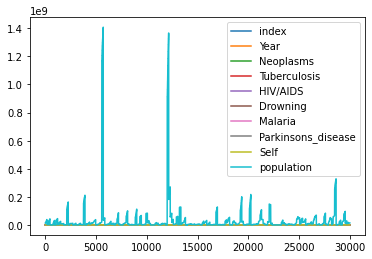

In [5]:
# Attempt to plot
Cause_df.plot()

In [6]:
# Encode Labels for SciKit Learn
le = LabelEncoder()
df2=Cause_df.copy()
#df2["Entity"] = le.fit_transform(df2["Entity"])
#df2["Code"] = le.fit_transform(df2["Code"])
# View Results (Bottom Half)
df2.tail()

,index,Entity,Country Code,Year,Age_Group,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,population
29995,6839,Zimbabwe,ZWE,2019,Under 5,57,661,1394,127,1207,0,0,14645473.0
29996,6839,Zimbabwe,ZWE,2019,15-49,1606,340,266,2725,4697,12653,0,14645473.0
29997,6839,Zimbabwe,ZWE,2019,5-14,11,219,446,106,207,1322,0,14645473.0
29998,6839,Zimbabwe,ZWE,2019,50-69,563,96,2969,4944,120,5622,0,14645473.0
29999,6839,Zimbabwe,ZWE,2019,70,222,47,1930,408,29,3843,0,14645473.0


In [7]:
# Encode Age_Group to binary numbers
df2_binary_encoded = pd.get_dummies(df2, columns=["Age_Group"])
col_list = ['Neoplasms','Tuberculosis','HIV/AIDS','Drowning','Malaria','Parkinsons_disease','Self']
df2_binary_encoded["Mortality Rate"] = df2_binary_encoded[col_list].sum(axis=1)
df2_binary_encoded["Mortality Rate"] = (df2_binary_encoded["Mortality Rate"]/df2_binary_encoded["population"])
df2_binary_encoded.head()


,index,Entity,Country Code,Year,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,population,Age_Group_15-49,Age_Group_5-14,Age_Group_50-69,Age_Group_70,Age_Group_Under 5,Mortality Rate
0,0,Afghanistan,AFG,1990,431,808,10,776,21,0,0,12412311.0,0,0,0,0,1,0.000165
1,0,Afghanistan,AFG,1990,482,234,46,2078,1208,15,0,12412311.0,1,0,0,0,0,0.000327
2,0,Afghanistan,AFG,1990,12,290,3,278,160,0,0,12412311.0,0,1,0,0,0,0.000060
3,0,Afghanistan,AFG,1990,167,55,1451,7,19,5446,0,12412311.0,0,0,1,0,0,0.000576
4,0,Afghanistan,AFG,1990,35,14,1034,1,5,3346,0,12412311.0,0,0,0,1,0,0.000357


In [8]:
# Create New column showing difference for Mortality Rate Year over
for row in df2_binary_encoded:
  df2_binary_encoded["Mortality Rate Difference"] = df2_binary_encoded["Mortality Rate"].diff(periods=5)

# Create Column Showing True/False if Mortality Rate went up or down year over year
for row in df2_binary_encoded:
  df2_binary_encoded["Increase"] = df2_binary_encoded["Mortality Rate Difference"].apply(lambda x: "True" if x>=.0000001 else "False")

df2_binary_encoded.head(15)


,index,Entity,Country Code,Year,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,population,Age_Group_15-49,Age_Group_5-14,Age_Group_50-69,Age_Group_70,Age_Group_Under 5,Mortality Rate,Mortality Rate Difference,Increase
0,0,Afghanistan,AFG,1990,431,808,10,776,21,0,0,12412311.0,0,0,0,0,1,0.000165,NaN,False
1,0,Afghanistan,AFG,1990,482,234,46,2078,1208,15,0,12412311.0,1,0,0,0,0,0.000327,NaN,False
2,0,Afghanistan,AFG,1990,12,290,3,278,160,0,0,12412311.0,0,1,0,0,0,0.000060,NaN,False
3,0,Afghanistan,AFG,1990,167,55,1451,7,19,5446,0,12412311.0,0,0,1,0,0,0.000576,NaN,False
4,0,Afghanistan,AFG,1990,35,14,1034,1,5,3346,0,12412311.0,0,0,0,1,0,0.000357,NaN,False
5,1,Afghanistan,AFG,1991,439,800,12,748,41,0,0,13299016.0,0,0,0,0,1,0.000153,-1.144154e-05,False
6,1,Afghanistan,AFG,1991,535,262,94,2183,1289,19,0,13299016.0,1,0,0,0,0,0.000329,2.161759e-06,True
7,1,Afghanistan,AFG,1991,12,311,6,299,170,0,0,13299016.0,0,1,0,0,0,0.000060,1.445149e-07,True
8,1,Afghanistan,AFG,1991,168,55,1447,8,38,5493,0,13299016.0,0,0,1,0,0,0.000542,-3.356799e-05,False
9,1,Afghanistan,AFG,1991,35,14,1036,1,11,3382,0,13299016.0,0,0,0,1,0,0.000337,-2.051471e-05,False


In [9]:
# Make each Country it's own DataFrame for Prediction Model
Country = {}
for Entity, Group in df2_binary_encoded.groupby('Entity'):
  Country["Group_" + (Entity)] = Group
  pd.DataFrame(Group)

In [10]:
Country

{'Group_Afghanistan':      index       Entity Country Code  Year  Neoplasms  Tuberculosis  HIV/AIDS  \
 0        0  Afghanistan          AFG  1990        431           808        10   
 1        0  Afghanistan          AFG  1990        482           234        46   
 2        0  Afghanistan          AFG  1990         12           290         3   
 3        0  Afghanistan          AFG  1990        167            55      1451   
 4        0  Afghanistan          AFG  1990         35            14      1034   
 ..     ...          ...          ...   ...        ...           ...       ...   
 145     29  Afghanistan          AFG  2019        620           344        98   
 146     29  Afghanistan          AFG  2019       1313           566       350   
 147     29  Afghanistan          AFG  2019         24           489        19   
 148     29  Afghanistan          AFG  2019        229            64       874   
 149     29  Afghanistan          AFG  2019         47            15       69

In [11]:
#Create empty dictionary to put all Countries into
Country = {}
for Entity, Group in df2_binary_encoded.groupby('Entity'):
  Country["Group_" + (Entity)] = Group
  pd.DataFrame(Group)

In [12]:
# Make each Entity into a Dataframe
for Entity in Country:
  (Country[Entity]) = pd.DataFrame(Country[Entity])
  
#countrydf = pd.DataFrame(Country["Group_Afghanistan"])
#countrydf.head()


In [13]:
#View one Country's Mortality data for 3 years
Country["Group_China"].head(15)
  

,index,Entity,Country Code,Year,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,population,Age_Group_15-49,Age_Group_5-14,Age_Group_50-69,Age_Group_70,Age_Group_Under 5,Mortality Rate,Mortality Rate Difference,Increase
5550,1140,China,CHN,1990,25048,19993,468,61123,240,0,0,1.135185e+09,0,0,0,0,1,0.000094,9.055700e-05,True
5551,1140,China,CHN,1990,130824,35881,833,264707,40645,1554,0,1.135185e+09,1,0,0,0,0,0.000418,2.098927e-04,True
5552,1140,China,CHN,1990,3549,41501,187,17255,2612,15,0,1.135185e+09,0,1,0,0,0,0.000057,5.024097e-05,True
5553,1140,China,CHN,1990,50640,9299,66202,531,219,704775,0,1.135185e+09,0,0,1,0,0,0.000733,1.174414e-04,True
5554,1140,China,CHN,1990,29730,5970,48008,130,55,447119,0,1.135185e+09,0,0,0,1,0,0.000468,-5.429337e-04,False
5555,1141,China,CHN,1991,24874,18391,542,59398,316,0,0,1.150780e+09,0,0,0,0,1,0.000090,-4.187761e-06,False
5556,1141,China,CHN,1991,129962,34618,1239,272292,38961,2008,0,1.150780e+09,1,0,0,0,0,0.000416,-1.635273e-06,False
5557,1141,China,CHN,1991,3450,41239,257,17324,2464,21,0,1.150780e+09,0,1,0,0,0,0.000056,-1.093689e-06,False
5558,1141,China,CHN,1991,51395,9075,63123,683,332,715394,0,1.150780e+09,0,0,1,0,0,0.000730,-2.684529e-06,False
5559,1141,China,CHN,1991,31467,6069,46976,166,102,465045,0,1.150780e+09,0,0,0,1,0,0.000478,1.000890e-05,True


In [14]:
# View all DFs in Dictionary
for x,y in Country.items():
  print(x,y)




Streaming output truncated to the last 5000 lines.
16195       669    14108                   0     0  19658023.0   
16196      1738     1451                2980     0  19658023.0   
16197       184      139                 178     0  19658023.0   
16198       931     1342                4169     0  19658023.0   
16199        78      687                2885     0  19658023.0   

       Age_Group_15-49  Age_Group_5-14  Age_Group_50-69  Age_Group_70  \
16050                0               0                0             0   
16051                1               0                0             0   
16052                0               1                0             0   
16053                0               0                1             0   
16054                0               0                0             1   
...                ...             ...              ...           ...   
16195                0               0                0             0   
16196                1            

In [15]:
#Make each Country Dictionary into a Dataframe
Afghanistan=pd.DataFrame(Country["Group_Afghanistan"])
Albania=pd.DataFrame(Country["Group_Albania"])
Algeria=pd.DataFrame(Country["Group_Algeria"])
AmericanSamoa=pd.DataFrame(Country["Group_American Samoa"])
Andorra=pd.DataFrame(Country["Group_Andorra"])
Angola=pd.DataFrame(Country["Group_Angola"])
AntiguaBarbuda=pd.DataFrame(Country["Group_Antigua and Barbuda"])
Argentina=pd.DataFrame(Country["Group_Argentina"])
Armenia=pd.DataFrame(Country["Group_Armenia"])
Australia=pd.DataFrame(Country["Group_Australia"])
Austria=pd.DataFrame(Country["Group_Austria"])
Azerbaijan=pd.DataFrame(Country["Group_Azerbaijan"])
Bahamas=pd.DataFrame(Country["Group_Bahamas"])
Bahrain=pd.DataFrame(Country["Group_Bahrain"])
Bangladesh=pd.DataFrame(Country["Group_Bangladesh"])
Barbados=pd.DataFrame(Country["Group_Barbados"])
Belarus=pd.DataFrame(Country["Group_Belarus"])
Belgium=pd.DataFrame(Country["Group_Belgium"])
Belize=pd.DataFrame(Country["Group_Belize"])
Benin=pd.DataFrame(Country["Group_Benin"])
Bermuda=pd.DataFrame(Country["Group_Bermuda"])
Bhutan=pd.DataFrame(Country["Group_Bhutan"])
Bolivia=pd.DataFrame(Country["Group_Bolivia"])
BosniaHerzegovina=pd.DataFrame(Country["Group_Bosnia and Herzegovina"])
Botswana=pd.DataFrame(Country["Group_Botswana"])
Brazil=pd.DataFrame(Country["Group_Brazil"])
Brunei=pd.DataFrame(Country["Group_Brunei"])
Bulgaria=pd.DataFrame(Country["Group_Bulgaria"])
BurkinaFaso=pd.DataFrame(Country["Group_Burkina Faso"])
Burundi=pd.DataFrame(Country["Group_Burundi"])
Cambodia=pd.DataFrame(Country["Group_Cambodia"])
Cameroon=pd.DataFrame(Country["Group_Cameroon"])
Canada=pd.DataFrame(Country["Group_Canada"])
CapeVerde=pd.DataFrame(Country["Group_Cape Verde"])
CentralAfricanRepublic=pd.DataFrame(Country["Group_Central African Republic"])
Chad=pd.DataFrame(Country["Group_Chad"])
Chile=pd.DataFrame(Country["Group_Chile"])
China=pd.DataFrame(Country["Group_China"])
Colombia=pd.DataFrame(Country["Group_Colombia"])
Comoros=pd.DataFrame(Country["Group_Comoros"])
Congo=pd.DataFrame(Country["Group_Congo"])
CostaRica=pd.DataFrame(Country["Group_Costa Rica"])
CotedIvoire=pd.DataFrame(Country["Group_Cote d'Ivoire"])
Croatia=pd.DataFrame(Country["Group_Croatia"])
Cuba=pd.DataFrame(Country["Group_Cuba"])
Cyprus=pd.DataFrame(Country["Group_Cyprus"])
Czechia=pd.DataFrame(Country["Group_Czechia"])
DemocraticRepublicofCongo=pd.DataFrame(Country["Group_Democratic Republic of Congo"])
Denmark=pd.DataFrame(Country["Group_Denmark"])
Djibouti=pd.DataFrame(Country["Group_Djibouti"])
Dominica=pd.DataFrame(Country["Group_Dominica"])
DominicanRepublic=pd.DataFrame(Country["Group_Dominican Republic"])
Ecuador=pd.DataFrame(Country["Group_Ecuador"])
Egypt=pd.DataFrame(Country["Group_Egypt"])
ElSalvador=pd.DataFrame(Country["Group_El Salvador"])
EquatorialGuinea=pd.DataFrame(Country["Group_Equatorial Guinea"])
Eritrea=pd.DataFrame(Country["Group_Eritrea"])
Estonia=pd.DataFrame(Country["Group_Estonia"])
Eswatini=pd.DataFrame(Country["Group_Eswatini"])
Ethiopia=pd.DataFrame(Country["Group_Ethiopia"])
Fiji=pd.DataFrame(Country["Group_Fiji"])
Finland=pd.DataFrame(Country["Group_Finland"])
France=pd.DataFrame(Country["Group_France"])
Gabon=pd.DataFrame(Country["Group_Gabon"])
Gambia=pd.DataFrame(Country["Group_Gambia"])
Georgia=pd.DataFrame(Country["Group_Georgia"])
Germany=pd.DataFrame(Country["Group_Germany"])
Ghana=pd.DataFrame(Country["Group_Ghana"])
Greece=pd.DataFrame(Country["Group_Greece"])
Greenland=pd.DataFrame(Country["Group_Greenland"])
Grenada=pd.DataFrame(Country["Group_Grenada"])
Guam=pd.DataFrame(Country["Group_Guam"])
Guatemala=pd.DataFrame(Country["Group_Guatemala"])
Guinea=pd.DataFrame(Country["Group_Guinea"])
GuineaBissau=pd.DataFrame(Country["Group_Guinea-Bissau"])
Guyana=pd.DataFrame(Country["Group_Guyana"])
Haiti=pd.DataFrame(Country["Group_Haiti"])
Honduras=pd.DataFrame(Country["Group_Honduras"])
Hungary=pd.DataFrame(Country["Group_Hungary"])
Iceland=pd.DataFrame(Country["Group_Iceland"])
India=pd.DataFrame(Country["Group_India"])
Indonesia=pd.DataFrame(Country["Group_Indonesia"])
Iran=pd.DataFrame(Country["Group_Iran"])
Iraq=pd.DataFrame(Country["Group_Iraq"])
Ireland=pd.DataFrame(Country["Group_Ireland"])
Israel=pd.DataFrame(Country["Group_Israel"])
Italy=pd.DataFrame(Country["Group_Italy"])
Jamaica=pd.DataFrame(Country["Group_Jamaica"])
Japan=pd.DataFrame(Country["Group_Japan"])
Jordan=pd.DataFrame(Country["Group_Jordan"])
Kazakhstan=pd.DataFrame(Country["Group_Kazakhstan"])
Kenya=pd.DataFrame(Country["Group_Kenya"])
Kiribati=pd.DataFrame(Country["Group_Kiribati"])
Kuwait=pd.DataFrame(Country["Group_Kuwait"])
Kyrgyzstan=pd.DataFrame(Country["Group_Kyrgyzstan"])
Laos=pd.DataFrame(Country["Group_Laos"])
Lebanon=pd.DataFrame(Country["Group_Lebanon"])
Latvia=pd.DataFrame(Country["Group_Latvia"])
Lesotho=pd.DataFrame(Country["Group_Lesotho"])
Liberia=pd.DataFrame(Country["Group_Liberia"])
Libya=pd.DataFrame(Country["Group_Libya"])
Lithuania=pd.DataFrame(Country["Group_Lithuania"])
Luxembourg=pd.DataFrame(Country["Group_Luxembourg"])
Madagascar=pd.DataFrame(Country["Group_Madagascar"])
Malawi=pd.DataFrame(Country["Group_Malawi"])
Malaysia=pd.DataFrame(Country["Group_Malaysia"])
Maldives=pd.DataFrame(Country["Group_Maldives"])
Mali=pd.DataFrame(Country["Group_Mali"])
Malta=pd.DataFrame(Country["Group_Malta"])
MarshallIslands=pd.DataFrame(Country["Group_Marshall Islands"])
Mauritania=pd.DataFrame(Country["Group_Mauritania"])
Mauritius=pd.DataFrame(Country["Group_Mauritius"])
Mexico=pd.DataFrame(Country["Group_Mexico"])
Micronesiacountry=pd.DataFrame(Country["Group_Micronesia (country)"])
Moldova=pd.DataFrame(Country["Group_Moldova"])
Monaco=pd.DataFrame(Country["Group_Monaco"])
Mongolia=pd.DataFrame(Country["Group_Mongolia"])
Montenegro=pd.DataFrame(Country["Group_Montenegro"])
Morocco=pd.DataFrame(Country["Group_Morocco"])
Mozambique=pd.DataFrame(Country["Group_Mozambique"])
Myanmar=pd.DataFrame(Country["Group_Myanmar"])
Namibia=pd.DataFrame(Country["Group_Namibia"])
Nauru=pd.DataFrame(Country["Group_Nauru"])
Nepal=pd.DataFrame(Country["Group_Nepal"])
Netherlands=pd.DataFrame(Country["Group_Netherlands"])
NewZealand=pd.DataFrame(Country["Group_New Zealand"])
Nicaragua=pd.DataFrame(Country["Group_Nicaragua"])
Niger=pd.DataFrame(Country["Group_Niger"])
Nigeria=pd.DataFrame(Country["Group_Nigeria"])
NorthKorea=pd.DataFrame(Country["Group_North Korea"])
NorthMacedonia=pd.DataFrame(Country["Group_North Macedonia"])
NorthernMarianaIslands=pd.DataFrame(Country["Group_Northern Mariana Islands"])
Norway=pd.DataFrame(Country["Group_Norway"])
Oman=pd.DataFrame(Country["Group_Oman"])
Pakistan=pd.DataFrame(Country["Group_Pakistan"])
Palau=pd.DataFrame(Country["Group_Palau"])
Palestine=pd.DataFrame(Country["Group_Palestine"])
Panama=pd.DataFrame(Country["Group_Panama"])
PapuaNewGuinea=pd.DataFrame(Country["Group_Papua New Guinea"])
Paraguay=pd.DataFrame(Country["Group_Paraguay"])
Peru=pd.DataFrame(Country["Group_Peru"])
Philippines=pd.DataFrame(Country["Group_Philippines"])
Poland=pd.DataFrame(Country["Group_Poland"])
Portugal=pd.DataFrame(Country["Group_Portugal"])
PuertoRico=pd.DataFrame(Country["Group_Puerto Rico"])
Qatar=pd.DataFrame(Country["Group_Qatar"])
Romania=pd.DataFrame(Country["Group_Romania"])
Russia=pd.DataFrame(Country["Group_Russia"])
Rwanda=pd.DataFrame(Country["Group_Rwanda"])
SaintKittsNevis=pd.DataFrame(Country["Group_Saint Kitts and Nevis"])
SaintLucia=pd.DataFrame(Country["Group_Saint Lucia"])
SaintVincenttheGrenadines=pd.DataFrame(Country["Group_Saint Vincent and the Grenadines"])
Samoa=pd.DataFrame(Country["Group_Samoa"])
SanMarino=pd.DataFrame(Country["Group_San Marino"])
SaoTomePrincipe=pd.DataFrame(Country["Group_Sao Tome and Principe"])
SaudiArabia=pd.DataFrame(Country["Group_Saudi Arabia"])
Senegal=pd.DataFrame(Country["Group_Senegal"])
Serbia=pd.DataFrame(Country["Group_Serbia"])
Seychelles=pd.DataFrame(Country["Group_Seychelles"])
SierraLeone=pd.DataFrame(Country["Group_Sierra Leone"])
Singapore=pd.DataFrame(Country["Group_Singapore"])
Slovakia=pd.DataFrame(Country["Group_Slovakia"])
Slovenia=pd.DataFrame(Country["Group_Slovenia"])
SolomonIslands=pd.DataFrame(Country["Group_Solomon Islands"])
Somalia=pd.DataFrame(Country["Group_Somalia"])
SouthAfrica=pd.DataFrame(Country["Group_South Africa"])
SouthKorea=pd.DataFrame(Country["Group_South Korea"])
SouthSudan=pd.DataFrame(Country["Group_South Sudan"])
Spain=pd.DataFrame(Country["Group_Spain"])
SriLanka=pd.DataFrame(Country["Group_Sri Lanka"])
Sudan=pd.DataFrame(Country["Group_Sudan"])
Suriname=pd.DataFrame(Country["Group_Suriname"])
Sweden=pd.DataFrame(Country["Group_Sweden"])
Switzerland=pd.DataFrame(Country["Group_Switzerland"])
Syria=pd.DataFrame(Country["Group_Syria"])
Tajikistan=pd.DataFrame(Country["Group_Tajikistan"])
Tanzania=pd.DataFrame(Country["Group_Tanzania"])
Thailand=pd.DataFrame(Country["Group_Thailand"])
Timor=pd.DataFrame(Country["Group_Timor"])
Togo=pd.DataFrame(Country["Group_Togo"])
Tonga=pd.DataFrame(Country["Group_Tonga"])
TrinidadTobago=pd.DataFrame(Country["Group_Trinidad and Tobago"])
Tunisia=pd.DataFrame(Country["Group_Tunisia"])
Turkey=pd.DataFrame(Country["Group_Turkey"])
Turkmenistan=pd.DataFrame(Country["Group_Turkmenistan"])
Tuvalu=pd.DataFrame(Country["Group_Tuvalu"])
Uganda=pd.DataFrame(Country["Group_Uganda"])
Ukraine=pd.DataFrame(Country["Group_Ukraine"])
UnitedArabEmirates=pd.DataFrame(Country["Group_United Arab Emirates"])
UnitedKingdom=pd.DataFrame(Country["Group_United Kingdom"])
UnitedStates=pd.DataFrame(Country["Group_United States"])
UnitedStatesVirginIslands=pd.DataFrame(Country["Group_United States Virgin Islands"])
Uruguay=pd.DataFrame(Country["Group_Uruguay"])
Uzbekistan=pd.DataFrame(Country["Group_Uzbekistan"])
Vanuatu=pd.DataFrame(Country["Group_Vanuatu"])
Venezuela=pd.DataFrame(Country["Group_Venezuela"])
Vietnam=pd.DataFrame(Country["Group_Vietnam"])
Yemen=pd.DataFrame(Country["Group_Yemen"])
Zambia=pd.DataFrame(Country["Group_Zambia"])
Zimbabwe=pd.DataFrame(Country["Group_Zimbabwe"])



In [16]:
#Make sure each is properly transferred to a Dataframe
Zambia.head()

,index,Entity,Country Code,Year,Neoplasms,Tuberculosis,HIV/AIDS,Drowning,Malaria,Parkinsons_disease,Self,population,Age_Group_15-49,Age_Group_5-14,Age_Group_50-69,Age_Group_70,Age_Group_Under 5,Mortality Rate,Mortality Rate Difference,Increase
29700,6780,Zambia,ZMB,1990,552,1338,3321,340,5801,0,0,8036849.0,0,0,0,0,1,0.001412,0.001389,True
29701,6780,Zambia,ZMB,1990,308,44,897,994,2919,7953,0,8036849.0,1,0,0,0,0,0.001632,0.001335,True
29702,6780,Zambia,ZMB,1990,25,67,504,88,153,54,0,8036849.0,0,1,0,0,0,0.000111,0.000085,True
29703,6780,Zambia,ZMB,1990,171,18,2339,1243,791,1859,0,8036849.0,0,0,1,0,0,0.000799,0.000567,True
29704,6780,Zambia,ZMB,1990,80,11,1333,135,276,1142,0,8036849.0,0,0,0,1,0,0.000370,0.000209,True


In [17]:
#Create input box for Users to Select Country

user_input = input("Select a Country: ")



Select a Country: Turkey


In [18]:
#User Input select DF by same name
user_input = eval(user_input)

In [19]:
# User input becomes Country DF by same name
user_input = locals().get(f'user_input')

In [20]:
# Prepare for ML Logistic Regression Analysis by encoding and preprocessing data
le=LabelEncoder()
X = user_input.copy()
X["Entity"] = le.fit_transform(X["Entity"])
X["Country Code"] = le.fit_transform(X["Country Code"])
X = X.drop("Increase", axis=1)
y = user_input["Increase"].values

#Train the Data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, stratify=y)


In [21]:
# Classify and complete Logistic Regression on Mortality Rate for User selected Country
classifier= LogisticRegression(solver='lbfgs', random_state=1)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
    intercept_scaling=1, max_iter=150, multi_class='warn', penalty='12',
    random_state=1, solver='lbfgs', tol=0.0001, warm_start=False)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.7105263157894737


In [22]:
#Print Model Accuracy Score
print(f"Model is {acc_score}% accurate")

Model is 0.7105263157894737% accurate


In [23]:
#Print and View Confusion Matrix
matrix=confusion_matrix(y_test, predictions)
print(matrix)

[[20  4]
 [ 7  7]]


In [24]:
# Print and View Classification Report
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

       False       0.74      0.83      0.78        24
        True       0.64      0.50      0.56        14

    accuracy                           0.71        38
   macro avg       0.69      0.67      0.67        38
weighted avg       0.70      0.71      0.70        38



In [25]:
#View final prediction to see if mortality rate will go up or down
predictions

array(['False', 'False', 'True', 'False', 'False', 'False', 'True',
       'True', 'True', 'False', 'False', 'False', 'False', 'False',
       'True', 'False', 'False', 'False', 'False', 'False', 'False',
       'False', 'True', 'False', 'True', 'False', 'False', 'False',
       'False', 'False', 'False', 'True', 'False', 'True', 'False',
       'False', 'True', 'True'], dtype=object)

In [24]:
# Model was originally planned to be a linear regression model to predict the exact mortality rate
# Original working linear regression model only achieved 34% accuracy.
# Due to the low accuracy score, the team decided to change the model.
# Model was changed between Checkpoint 2 and 3 to a logistic Regression Model